In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntRangeSlider, IntSlider
import importlib
import tip_visualization
importlib.reload(tip_visualization)
from tip_visualization import *

In [22]:
# Load data
df = load_keypoints('tip.csv')
print(f"Frames: {df['Frame'].min()} - {df['Frame'].max()} ({len(df)} total)")

Frames: 1030 - 343187 (70705 total)


In [18]:
# Interactive heatmap visualizer
@interact(
    frame_range=IntRangeSlider(value=[df['Frame'].min(), df['Frame'].min()+1000], 
                                min=df['Frame'].min(), max=df['Frame'].max(), 
                                description='Frames:', continuous_update=False),
    bins=IntSlider(value=40, min=10, max=100, description='Bins:', continuous_update=False)
)
def interactive_heatmaps(frame_range, bins):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    df_sub = df[(df['Frame'] >= frame_range[0]) & (df['Frame'] <= frame_range[1])]
    
    # Density heatmap
    hist, xe, ye = np.histogram2d(df_sub['X'], df_sub['Y'], bins=bins)
    im = ax.imshow(hist.T, origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]], 
                   cmap='turbo', aspect='auto', interpolation='gaussian')
    ax.set_title(f'Tongue Tip Position Heatmap (Frames {frame_range[0]}-{frame_range[1]})')
    ax.set_xlabel('X Position (pixels)')
    ax.set_ylabel('Y Position (pixels)')
    plt.colorbar(im, ax=ax, label='Density')
    
    plt.tight_layout()
    plt.show()


interactive(children=(IntRangeSlider(value=(1030, 2030), continuous_update=False, description='Frames:', max=3…


Detected 5 licks
Average lick duration: 36.6 frames


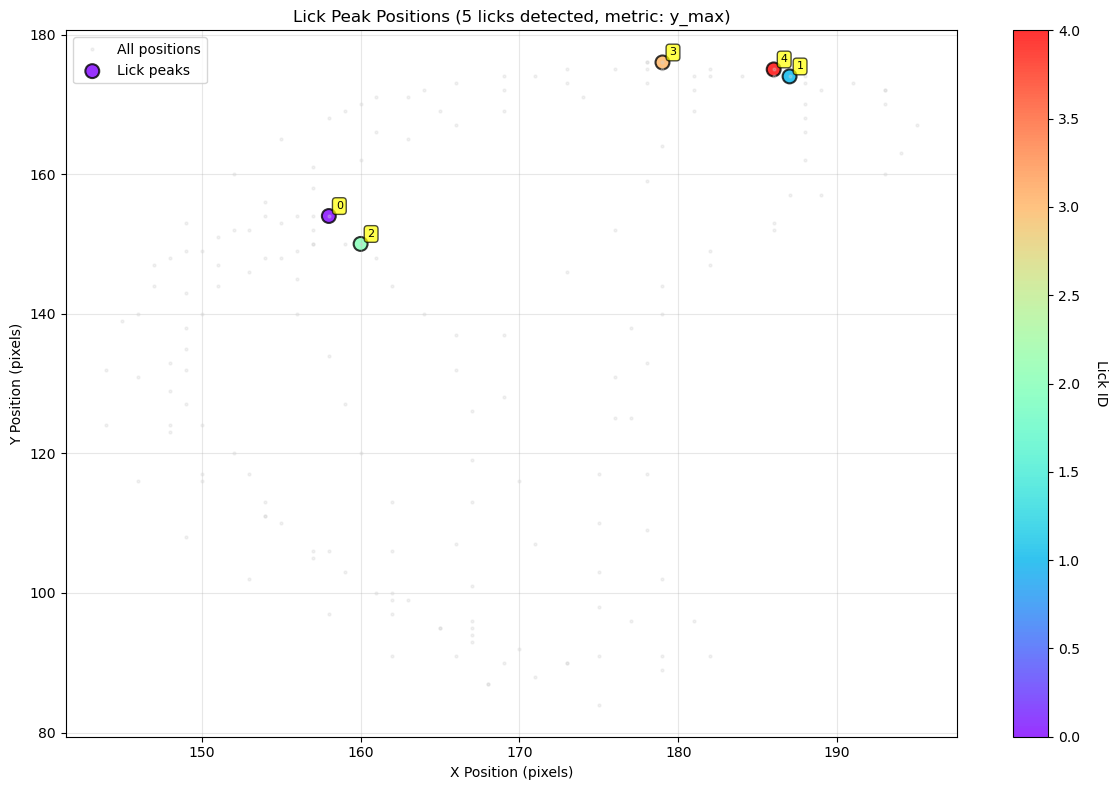


Peak positions for each lick:
   lick_id   frame      x      y  probability  lick_duration  \
0        0  1043.0  158.0  154.0         0.87             33   
1        1  1107.0  187.0  174.0         0.87             40   
2        2  3249.0  160.0  150.0         0.88             31   
3        3  3301.0  179.0  176.0         0.87             41   
4        4  3370.0  186.0  175.0         0.87             38   

   lick_start_frame  lick_end_frame  
0            1030.0          1062.0  
1            1089.0          1128.0  
2            3236.0          3266.0  
3            3287.0          3327.0  
4            3351.0          3388.0  


In [ ]:
# Interactive lick peak visualizer
@interact(
    frame_range=IntRangeSlider(value=[df['Frame'].min(), df['Frame'].min()+5000], 
                                min=df['Frame'].min(), max=df['Frame'].max(), 
                                description='Frames:', continuous_update=False),
    max_gap=IntSlider(value=5, min=1, max=50, description='Max Gap:', continuous_update=False)
)
def interactive_lick_peaks(frame_range, max_gap):
    fig, peaks_df = plot_lick_peaks(df, frame_range=frame_range, 
                                     max_gap=max_gap, peak_metric='y_max')
    plt.show()
    
    # Display peak data
    print("\nPeak positions for detected licks:")
    print(peaks_df[['lick_id', 'frame', 'x', 'y', 'lick_duration', 'lick_start_frame', 'lick_end_frame']].head(15))